# Data Generator for Classification Case

with logical equation in background

Use Case: Interview


number_of _rows = 100

- personal score: 3 (Score range: 1-5)
- academic degree (0: no academic, 1:bachelor, 2:master, 3:phd)
- Technical Score Rage: 0-5
  - [3] python: 4
  - [3] sql: 4
  - [1] nosql: 3
  - [5] functionaloriented: 4
  - [3] objectoriented: 3
  
- Technical score (calc) : 3*4 + 3*4 + 1*3 + 5*4 + 3*3 
- Summe Scoring: personal + academic degree + technical 
- 
- Classes:
  - < 20 : absagen
  - < 30 : HR Senior Review
  - < 40 : Fachabteilung Review
  - >= 40 : Phase 2 Interview Termin einstellen



Write a PROGRAM (Python) to generate the csv file with certain number of rows . The fields and the scoring should be defined in a separete JSON file.

Use the generated CSV File first of all to train your model. After finishing the training of the model. Use the model to predict a NEW csv file will following data: 
- Personal Score
- Academic Degree
- Technical Score

And predict the required class 


Individual Work ONLY



In [70]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import seaborn as sn

In [71]:
# generating data in the begining to create a dataframe.


d={'personal_score':np.random.randint(low = 1,high=6,size=100),
    'academic_score': np.random.randint(low = 0,high=4,size=100),
    'python':np.random.randint(low = 1,high=6,size=100),
    'sql':np.random.randint(low = 1,high=6,size=100),
    'nosql':np.random.randint(low = 1,high=6,size=100),
    'functionoriented':np.random.randint(low = 1,high=6,size=100),
    'objectoriented':np.random.randint(low = 1,high=6,size=100)}

df= pd.DataFrame(data=d)
df







,personal_score,academic_score,python,sql,nosql,functionoriented,objectoriented
0,4,2,4,4,4,1,5
1,1,1,2,1,3,1,1
2,4,0,2,5,1,4,1
3,2,2,5,2,3,5,4
4,4,2,4,2,3,4,1
...,...,...,...,...,...,...,...
95,1,1,5,4,3,2,3
96,3,2,5,4,5,1,3
97,2,2,4,4,2,3,2
98,5,2,1,2,4,1,2


In [72]:
# adding column academic_degree with respect to academic score

dictionary = {
    0:'no_academic' ,
    1: 'bachelor',
    2: 'master',
    3: 'phd',
    
}


df['academic_degree']=df['academic_score'].map(dictionary)



df.head()


,personal_score,academic_score,python,sql,nosql,functionoriented,objectoriented,academic_degree
0,4,2,4,4,4,1,5,master
1,1,1,2,1,3,1,1,bachelor
2,4,0,2,5,1,4,1,no_academic
3,2,2,5,2,3,5,4,master
4,4,2,4,2,3,4,1,master


In [73]:
python_factor=3
sql_factor=3
nosql_factor=3
objectoriented_factor=3
functionoriented_factor=3


# creating Technical score dataframe=df1  with fields in above previously existed df

data2={
    'TScore_python':df['python']*(python_factor),
    'TScore_sql':df['sql']*(sql_factor),
    'TScore_nosql':df['nosql']*(nosql_factor),
    'TScore_functionoriented':df['functionoriented']*(objectoriented_factor),
    'TScore_objectoriented':df['objectoriented']*(functionoriented_factor)}

df1=pd.DataFrame(data=data2)
df1['Total_technical_score']=df1['TScore_python']+df1['TScore_sql']+df1['TScore_nosql']+df1['TScore_functionoriented']+df1['TScore_objectoriented']
df1

,TScore_python,TScore_sql,TScore_nosql,TScore_functionoriented,TScore_objectoriented,Total_technical_score
0,12,12,12,3,15,54
1,6,3,9,3,3,24
2,6,15,3,12,3,39
3,15,6,9,15,12,57
4,12,6,9,12,3,42
...,...,...,...,...,...,...
95,15,12,9,6,9,51
96,15,12,15,3,9,54
97,12,12,6,9,6,45
98,3,6,12,3,6,30


In [74]:
# Adding Total_score column in previous dataframe df.

df['Total_score']=df1['Total_technical_score']+df['personal_score']+df['academic_score']
df

,personal_score,academic_score,python,sql,nosql,functionoriented,objectoriented,academic_degree,Total_score
0,4,2,4,4,4,1,5,master,60
1,1,1,2,1,3,1,1,bachelor,26
2,4,0,2,5,1,4,1,no_academic,43
3,2,2,5,2,3,5,4,master,61
4,4,2,4,2,3,4,1,master,48
...,...,...,...,...,...,...,...,...,...
95,1,1,5,4,3,2,3,bachelor,53
96,3,2,5,4,5,1,3,master,59
97,2,2,4,4,2,3,2,master,49
98,5,2,1,2,4,1,2,master,37


In [75]:
import json

    
# - Classes:
#   - < 20 : absagen
#   - < 30 : HR Senior Review
#   - < 40 : Fachabteilung Review
#   - >= 40 : Phase 2 Interview Termin einstellen

# Now adding column Class in dataframe with respect to total_score value
def func(x):
    if 0 < x <= 20:
        return 'absagen'
    elif 20< x <= 30:
        return 'HR_senior_Review'
    elif 30< x <= 40:
        return 'Fach_abteilung_review'
    else:
        return 'Phase_2_Interview'
    

df['class_type'] = df['Total_score'].apply(func)
df


,personal_score,academic_score,python,sql,nosql,functionoriented,objectoriented,academic_degree,Total_score,class_type
0,4,2,4,4,4,1,5,master,60,Phase_2_Interview
1,1,1,2,1,3,1,1,bachelor,26,HR_senior_Review
2,4,0,2,5,1,4,1,no_academic,43,Phase_2_Interview
3,2,2,5,2,3,5,4,master,61,Phase_2_Interview
4,4,2,4,2,3,4,1,master,48,Phase_2_Interview
...,...,...,...,...,...,...,...,...,...,...
95,1,1,5,4,3,2,3,bachelor,53,Phase_2_Interview
96,3,2,5,4,5,1,3,master,59,Phase_2_Interview
97,2,2,4,4,2,3,2,master,49,Phase_2_Interview
98,5,2,1,2,4,1,2,master,37,Fach_abteilung_review


In [76]:
df.head()

,personal_score,academic_score,python,sql,nosql,functionoriented,objectoriented,academic_degree,Total_score,class_type
0,4,2,4,4,4,1,5,master,60,Phase_2_Interview
1,1,1,2,1,3,1,1,bachelor,26,HR_senior_Review
2,4,0,2,5,1,4,1,no_academic,43,Phase_2_Interview
3,2,2,5,2,3,5,4,master,61,Phase_2_Interview
4,4,2,4,2,3,4,1,master,48,Phase_2_Interview


In [77]:
df1.head()

,TScore_python,TScore_sql,TScore_nosql,TScore_functionoriented,TScore_objectoriented,Total_technical_score
0,12,12,12,3,15,54
1,6,3,9,3,3,24
2,6,15,3,12,3,39
3,15,6,9,15,12,57
4,12,6,9,12,3,42


In [78]:

# creating csv file of selected rows from dataframes as train data
train_data_slice1= df.loc[0:59,['personal_score','academic_score']]
train_data_slice2=df1.loc[0:59,'Total_technical_score']
train_data=pd.concat([train_data_slice1,train_data_slice2],axis=1)
train_data.head()
result=train_data.to_csv('./our_train_data.csv')

In [79]:
train_data.head()

,personal_score,academic_score,Total_technical_score
0,4,2,54
1,1,1,24
2,4,0,39
3,2,2,57
4,4,2,42


In [80]:

# creating json file which includes certain fields and Total score from df.
result_json=df.loc[:,'python':'Total_score']
result_json.to_json('./data.json',orient="table")

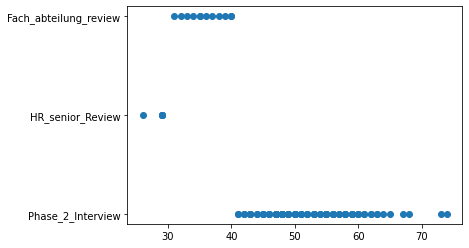

In [81]:
plt.scatter(df.Total_score,df.class_type)

# Split Data

In [82]:


X= train_data
y=df.loc[0:59,'class_type']
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

# train the Model

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

c:\Python3104\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166666666666666

# Predict for some data


In [84]:

y_predicted=model.predict(X_test)

In [85]:
y_test

6         Phase_2_Interview
9         Phase_2_Interview
12        Phase_2_Interview
7         Phase_2_Interview
37        Phase_2_Interview
15        Phase_2_Interview
3         Phase_2_Interview
26        Phase_2_Interview
42        Phase_2_Interview
33        Phase_2_Interview
20    Fach_abteilung_review
13        Phase_2_Interview
Name: class_type, dtype: object

Scoring the model

In [86]:
model.score(X_test, y_test)

0.9166666666666666

# Reading the coefficients

In [87]:
# for y=mx+b
model.coef_   # m slope

array([[ 2.84366247e-05,  3.05658599e-01, -1.85683243e-03],
       [-2.10185336e-01, -2.58445702e-01, -1.06147068e+00],
       [ 2.10156899e-01, -4.72128973e-02,  1.06332751e+00]])

In [88]:
model.intercept_  # b intercept

array([  3.0606823 ,  30.98766503, -34.04834733])

# Consusion Matrix

In [89]:
# 1. Variant One using Sklearn

cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 0,  1],
       [ 0, 11]], dtype=int64)

Text(69.0, 0.5, 'True')

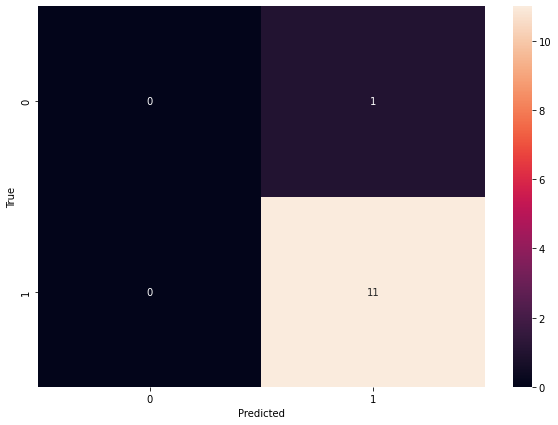

In [90]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("True")

# saving the model into pickle file

In [91]:
import pickle

In [92]:
#save the model
with open('./Models/my_pickle_logistic_reg.pkl','wb') as file:
    pickle.dump(model,file)

In [93]:
# Load the model from a pickle

with open("./Models/my_pickle_logistic_reg.pkl", "rb") as file:
    model2 = pickle.load(file)

print(model2.coef_)
print(model2.intercept_)

# use model2 for predictions when the personal_score is 3, academic_score is 2, technical_score is 40.
model2.predict([[3,2,40]]) # we ge the answer or out 'Phse 2 Interview' for the input data.

[[ 2.84366247e-05  3.05658599e-01 -1.85683243e-03]
 [-2.10185336e-01 -2.58445702e-01 -1.06147068e+00]
 [ 2.10156899e-01 -4.72128973e-02  1.06332751e+00]]
[  3.0606823   30.98766503 -34.04834733]


c:\Python3104\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Phase_2_Interview'], dtype=object)

# Saving the model in Joblib

In [94]:
import joblib
# Save model
joblib.dump(model, "./Models/model_linear_reg.jlb")
# joblib.dump(reg, "./models/model_linear_reg_v3.jlb", compress = True)
# joblib.dump(reg, "./models/model_linear_reg_v3.bz2", compress=("bz2", 3))

['./Models/model_linear_reg.jlb']

In [95]:
# Load model
model3 = joblib.load( "./Models/model_linear_reg.jlb")

print(model3.coef_)
print(model3.intercept_)

# use model3 for predictions when the personal_score is 3, academic_score is 2, technical_score is 40.
model3.predict([[3,2,40]])

[[ 2.84366247e-05  3.05658599e-01 -1.85683243e-03]
 [-2.10185336e-01 -2.58445702e-01 -1.06147068e+00]
 [ 2.10156899e-01 -4.72128973e-02  1.06332751e+00]]
[  3.0606823   30.98766503 -34.04834733]


c:\Python3104\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Phase_2_Interview'], dtype=object)